# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
# Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

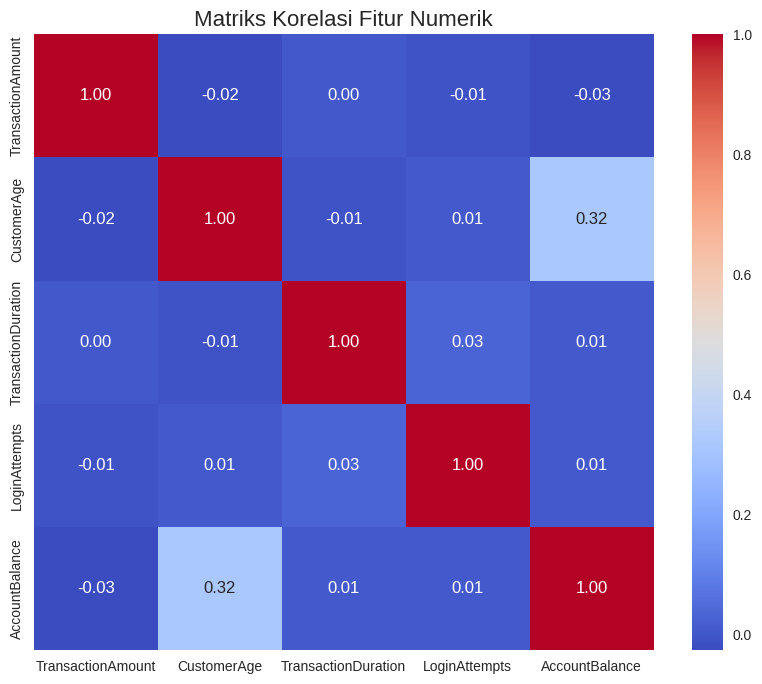

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)
plt.show()

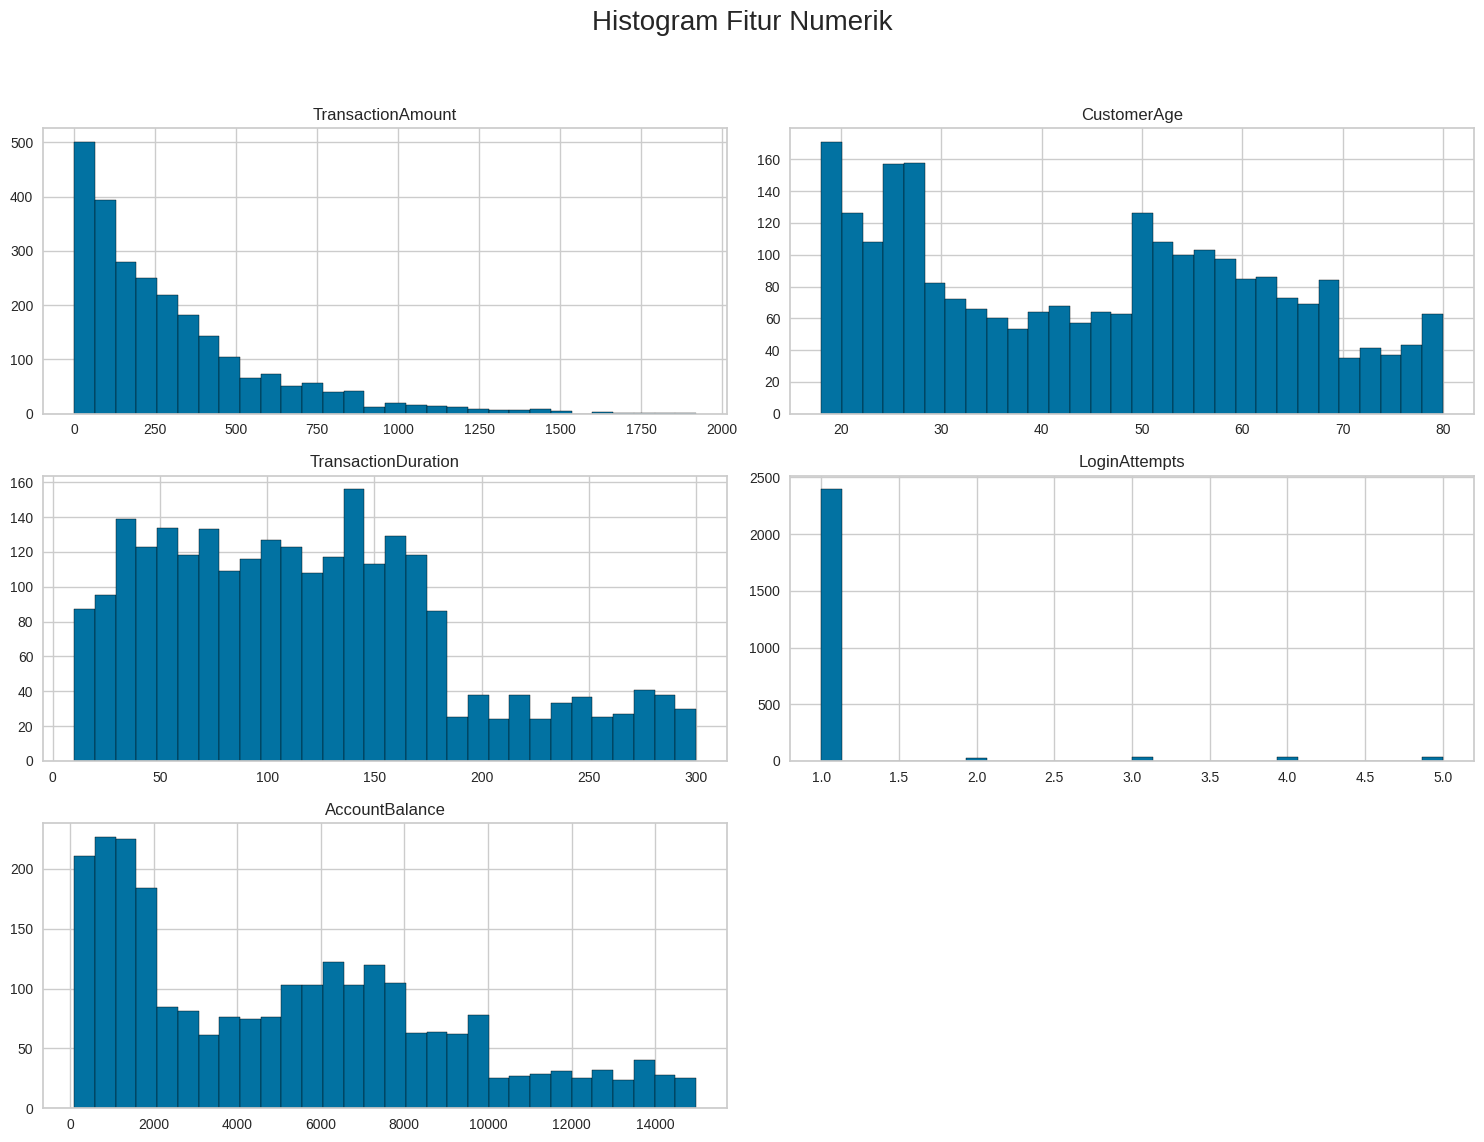

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df[numerical_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Histogram Fitur Numerik', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print(df.duplicated().sum())

21


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Dilakukuan di tahap terakhir

In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
columns_to_drop = [
    'TransactionID',
    'AccountID',
    'DeviceID',
    'MerchantID',
    'IP Address',
    'Location',
    'TransactionDate',
    'PreviousTransactionDate'
]
df = df.drop(columns=columns_to_drop, errors='ignore')

# Tampilkan informasi DataFrame setelah drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2511 non-null   float64
 1   TransactionType      2507 non-null   object 
 2   Channel              2510 non-null   object 
 3   CustomerAge          2519 non-null   float64
 4   CustomerOccupation   2514 non-null   object 
 5   TransactionDuration  2511 non-null   float64
 6   LoginAttempts        2516 non-null   float64
 7   AccountBalance       2510 non-null   float64
dtypes: float64(5), object(3)
memory usage: 158.7+ KB


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Dilkukan di akhir

In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

/tmp/ipython-input-2980983189.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2980983189.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
TransactionAmount,0
TransactionType,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
print("Jumlah duplikat setelah dihapus:", df.duplicated().sum())

Jumlah duplikat setelah dihapus: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2513.000000,2513.000000,2513.000000,2513.0,2513.000000
mean,284.435328,44.643936,119.573417,1.0,5117.611233
std,249.597857,17.752122,69.642931,0.0,3877.769041
min,0.260000,18.000000,10.000000,1.0,101.250000
25%,83.070000,27.000000,63.000000,1.0,1519.380000
50%,213.420000,45.000000,114.000000,1.0,4840.310000
75%,409.610000,59.000000,161.000000,1.0,7642.250000
max,899.420000,80.000000,300.000000,1.0,14977.990000


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
# Catatan: Kolom-kolom ini akan di-drop setelah scaling.

# Salinan DataFrame untuk disimpan tanpa scaling dan encoding (untuk inverse_transform)
df_original_copy = df.copy()

# Binning fitur CustomerAge dan TransactionAmount
bins_age = [0, 25, 45, 65, np.inf]
labels_age = ['Muda', 'Dewasa', 'Paruh Baya', 'Lansia']
df['CustomerAge_binned'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age, right=False)
df.drop(columns=['CustomerAge'], inplace=True)

df['TransactionAmount_binned'] = pd.qcut(df['TransactionAmount'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])
df.drop(columns=['TransactionAmount'], inplace=True)

# Encoding fitur kategorikal dan hasil binning
encoders = {}
categorical_cols_to_encode = ['TransactionType', 'Channel', 'CustomerOccupation', 'CustomerAge_binned', 'TransactionAmount_binned']

for col in categorical_cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le # Simpan encoder untuk inverse transform

# Melakukan feature scaling menggunakan StandardScaler()
scaler = StandardScaler()
# Apply scaling to all columns in df, as they are now numerical
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


# Tampilkan 5 baris pertama setelah scaling
df_scaled.head()

,TransactionType,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_binned,TransactionAmount_binned
0,0.536710,-1.230425,-1.340853,-0.553984,0.0,-0.001393,-0.402926,-1.224501
1,0.536710,-1.230425,-1.340853,0.307725,0.0,2.228864,-0.402926,1.224501
2,0.536710,1.256152,1.304017,-0.913030,0.0,-1.030504,0.383829,0.000000
3,0.536710,1.256152,1.304017,-1.358246,0.0,0.890238,-1.189682,0.000000
4,-1.863204,1.256152,1.304017,1.126348,0.0,0.596283,-1.189682,-1.224501


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()


,TransactionType,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_binned,TransactionAmount_binned
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.0,2513.000000,2513.000000,2513.000000
mean,0.776363,0.989654,1.520891,119.573417,1.0,5117.611233,1.512137,1.000000
std,0.416765,0.804479,1.134497,69.642931,0.0,3877.769041,1.271296,0.816822
min,0.000000,0.000000,0.000000,10.000000,1.0,101.250000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,63.000000,1.0,1519.380000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,114.000000,1.0,4840.310000,2.000000,1.000000
75%,1.000000,2.000000,3.000000,161.000000,1.0,7642.250000,3.000000,2.000000
max,1.000000,2.000000,3.000000,300.000000,1.0,14977.990000,3.000000,2.000000


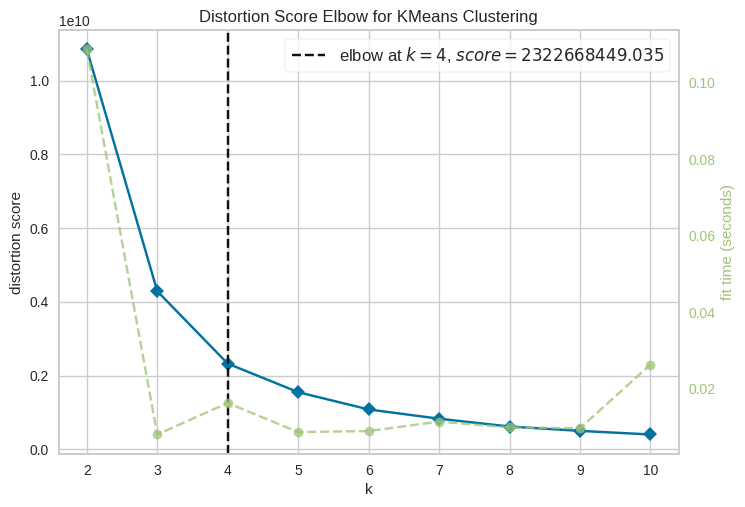

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Inisialisasi model K-Means
model = KMeans(random_state=42, n_init='auto')

# Visualisasi Elbow Method untuk menentukan jumlah cluster terbaik
visualizer = KElbowVisualizer(model, k=(2, 11))
visualizer.fit(df)
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
# Berdasarkan visualisasi Elbow Method, kita akan menggunakan 3 cluster
kmeans_model = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['Cluster_Label'] = kmeans_model.fit_predict(df)

# Tampilkan jumlah sampel di setiap cluster
print("Jumlah sampel di setiap cluster:")
print(df['Cluster_Label'].value_counts())

Jumlah sampel di setiap cluster:
Cluster_Label
1    883
0    615
4    394
3    393
2    228
Name: count, dtype: int64


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans_model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df.drop('Cluster_Label', axis=1), df['Cluster_Label'])
print(f"Nilai Silhouette Score: {silhouette_avg:.4f}")

Nilai Silhouette Score: 0.5862


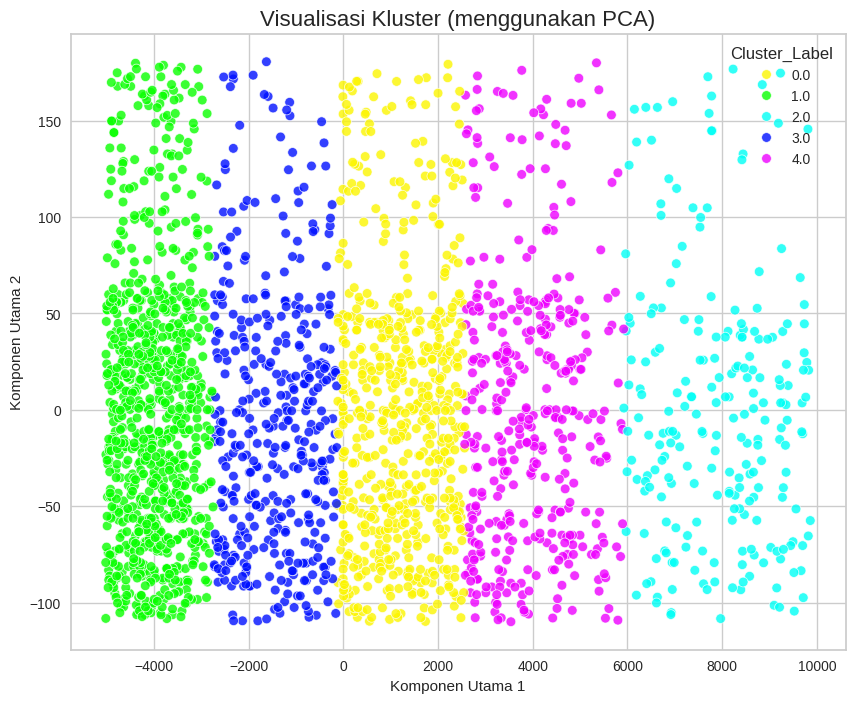

In [24]:
# Membuat visualisasi hasil clustering
# Reduksi dimensi menggunakan PCA ke 2 komponen untuk visualisasi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop('Cluster_Label', axis=1))

# Buat DataFrame baru dari hasil PCA
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster_Label'] = df['Cluster_Label']

# Buat scatter plot untuk memvisualisasikan kluster
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_Label',
    palette=sns.color_palette("hsv", n_colors=len(df['Cluster_Label'].unique())),
    data=pca_df,
    legend="full",
    alpha=0.8
)
plt.title('Visualisasi Kluster (menggunakan PCA)', fontsize=16)
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

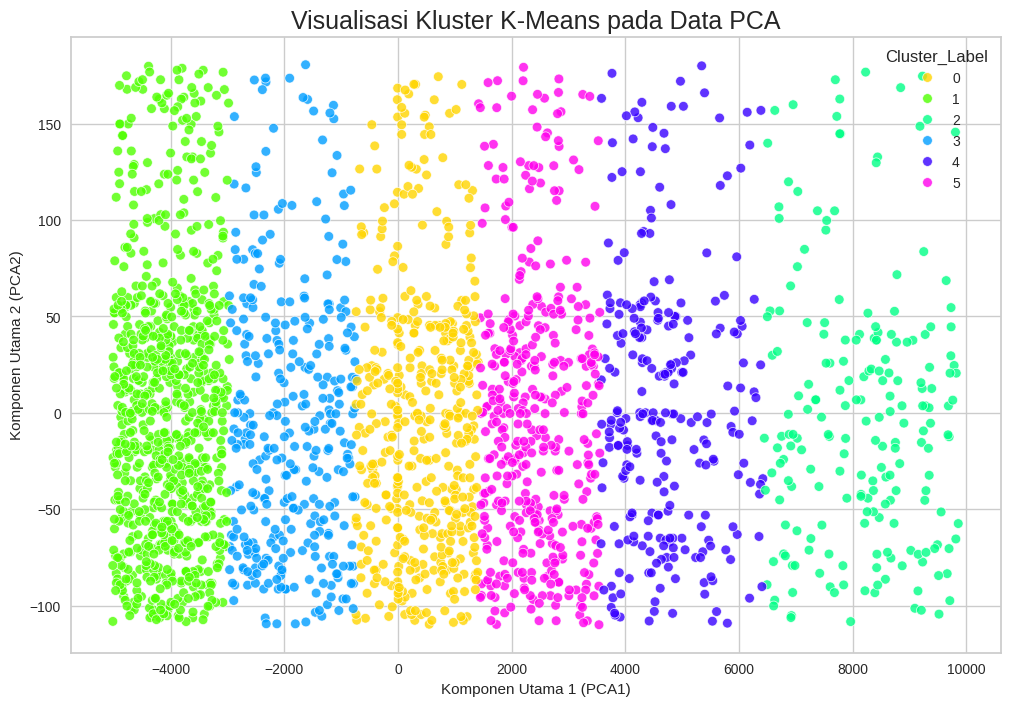

In [25]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

# Reduksi dimensi menggunakan PCA menjadi 3 komponen
pca = PCA(n_components=3, random_state=42)
pca_data = pca.fit_transform(df.drop('Cluster_Label', axis=1))

# Simpan data PCA sebagai DataFrame
df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Bangun model KMeans baru dengan data yang sudah direduksi
kmeans_pca = KMeans(n_clusters=6, random_state=42, n_init='auto')
kmeans_pca.fit(df_pca)

# Dapatkan label cluster dari model K-Means yang dilatih pada data PCA
cluster_labels = kmeans_pca.labels_

# Tambahkan kolom cluster_labels ke DataFrame PCA
df_pca['Cluster_Label'] = cluster_labels

# Buat visualisasi
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_Label',
    palette=sns.color_palette("hsv", n_colors=len(df_pca['Cluster_Label'].unique())),
    data=df_pca,
    legend="full",
    alpha=0.8
)
plt.title('Visualisasi Kluster K-Means pada Data PCA', fontsize=18)
plt.xlabel('Komponen Utama 1 (PCA1)')
plt.ylabel('Komponen Utama 2 (PCA2)')
plt.grid(True)
plt.show()

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

df['Cluster_Label_PCA'] = kmeans_pca.labels_

final_numerical_cols = df.drop(['Cluster_Label', 'Cluster_Label_PCA'], axis=1).columns

cluster_summary_pca = df.groupby('Cluster_Label_PCA')[final_numerical_cols].agg(['mean', 'min', 'max'])

print("Analisis Karakteristik Cluster Berdasarkan Model PCA (6 Cluster):")
print(cluster_summary_pca)

Analisis Karakteristik Cluster Berdasarkan Model PCA (6 Cluster):
                  TransactionType           Channel          \
                             mean min max      mean min max   
Cluster_Label_PCA                                             
0                        0.791667   0   1  1.035088   0   2   
1                        0.785630   0   1  0.981154   0   2   
2                        0.726368   0   1  0.995025   0   2   
3                        0.754491   0   1  0.985030   0   2   
4                        0.800000   0   1  0.976923   0   2   
5                        0.767554   0   1  0.966102   0   2   

                  CustomerOccupation         TransactionDuration  ...  \
                                mean min max                mean  ...   
Cluster_Label_PCA                                                 ...   
0                           1.375000   0   3          117.304149  ...   
1                           2.407538   0   3          120.726193  ...   
2

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Rata-rata)**:
  - **Rata-rata (mean) Saldo Akun:** 5536.20 (Cukup)
  - **Rata-rata (mean) Pekerjaan:** 1.37 (Menengah)
  - **Analisis:**  Cluster ini tampaknya mewakili profil nasabah pada umumnya atau standar. Mereka memiliki saldo akun yang tidak terlalu tinggi ataupun rendah. Pola transaksi dan demografi mereka tidak menunjukkan adanya penyimpangan yang signifikan, menjadikan cluster ini sebagai baseline untuk perilaku nasabah normal.

2. **Cluster 1: (Nasabah Saldo Rendah)**:
  - **Rata-rata (mean) Saldo Akun:** 1078.13 (Sangat Rendah)
  - **Rata-rata (mean) Pekerjaan :** 2.40 (Paling Tinggi)
  - **Analisis:**  Cluster ini secara jelas menampung nasabah dengan saldo akun rata-rata yang paling rendah dibandingkan semua cluster lainnya. Menariknya, mereka berasal dari kategori pekerjaan tertentu (nilai mean tertinggi). Dari sisi risiko, kelompok ini mungkin kurang menarik untuk penipuan skala besar, namun bisa jadi target untuk penipuan skala kecil atau menjadi akun perantara (mule account).

3. **Cluster 2: (Nasabah Prioritas/tinggi)**:
  - **Rata-rata (mean) Saldo Akun:** 13272.31 (Sangat Tinggi)
  - **Rata-rata (mean) Pekerjaan Nasabah:** 0.01 (Sangat Rendah)
  - **Analisis:**  Ini adalah cluster yang paling menonjol, berisi nasabah dengan saldo akun rata-rata tertinggi. Kombinasi saldo yang sangat tinggi dengan kode pekerjaan yang mendekati nol (mungkin mengindikasikan wiraswasta, pensiunan, atau kategori khusus lainnya) menjadikan cluster ini sangat penting. Akun-akun ini harus dipantau secara ketat karena merupakan target bernilai tinggi untuk upaya pengambilalihan akun (account takeover) atau penipuan canggih lainnya.

4. **Cluster 3: (Nasabah Senior)**:
  - **Rata-rata (mean) Saldo Akun :** 3235.77 (Rendah)
  - **Rata-rata (mean) Kelompok Usia Nasabah  :** 1.72 (Paling Tinggi)
  - **Analisis:**  Cluster ini memiliki rata-rata usia nasabah tertinggi dari semua kelompok. Dengan saldo akun yang relatif rendah, kelompok ini bisa jadi mewakili nasabah pensiunan atau senior. Mereka mungkin menjadi target penipuan yang bersifat rekayasa sosial (social engineering) karena potensi kerentanan yang lebih tinggi terhadap taktik semacam itu.

5. **Cluster 4: (Potensi Transaksi Kompleks / Anomali)**:
  - **Rata-rata (mean) Saldo Akun:** 9840.73 (Tinggi)
  - **Rata-rata (mean) Durasi Transaksi  :** 125.89 (Paling Tinggi)
  - **Analisis:**  Meskipun saldo akunnya tinggi (kedua tertinggi), yang paling mencolok dari cluster ini adalah durasi transaksi rata-rata yang paling lama. Durasi transaksi yang lebih lama dari biasanya bisa menjadi indikator adanya proses verifikasi tambahan, transaksi yang kompleks, atau bahkan jeda waktu yang tidak wajar selama proses transaksi yang bisa mengindikasikan aktivitas mencurigakan. Cluster ini wajib ditandai untuk pemantauan anomali.

5. **Cluster 5: (Nasabah Mapan)**:
  - **Rata-rata (mean) Tipe Transaksi:** 0.76 (Standar)
  - **Rata-rata (mean) Saldo Akun :** 7539.07 (Cukup Tinggi)
  - **Analisis:**  Serupa dengan Cluster 0, kelompok ini juga mewakili nasabah dengan perilaku yang relatif normal. Namun, mereka memiliki tingkat kemapanan yang lebih tinggi, terlihat dari saldo akun rata-rata yang lebih besar. Mereka bisa dianggap sebagai nasabah "sehat" dengan risiko rendah.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

if 'Cluster_Label' in df.columns:
    df = df.drop('Cluster_Label', axis=1)

df.rename(columns={'Cluster_Label_PCA': 'Target'}, inplace=True)
print("Nama kolom cluster dari model PCA telah diubah menjadi 'Target':")
print(df.columns)



Nama kolom cluster dari model PCA telah diubah menjadi 'Target':
Index(['TransactionType', 'Channel', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'CustomerAge_binned', 'TransactionAmount_binned', 'Target'],
      dtype='object')


In [29]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

df_inverse = df.copy()

# Inverse transform dataset numerik ke rentang aslinya
# Pastikan variabel 'scaler' adalah scaler yang Anda gunakan saat pra-pemrosesan
all_scaled_cols = ['TransactionType', 'Channel', 'CustomerOccupation', 'TransactionDuration',
                   'LoginAttempts', 'AccountBalance', 'CustomerAge_binned', 'TransactionAmount_binned']
df_inverse[all_scaled_cols] = scaler.inverse_transform(df[all_scaled_cols])
print("\nData setelah inverse scaling (5 baris pertama):")
df_inverse.head()



Data setelah inverse scaling (5 baris pertama):


,TransactionType,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_binned,TransactionAmount_binned,Target
0,1.193044,0.989654,1.520891,5759.528362,2.0,1.982514e+07,2.783180,1.000000,0
1,1.193044,0.989654,1.520891,9937.272766,2.0,5.334838e+07,2.783180,2.633318,2
2,1.193044,2.598291,4.923705,4018.801527,2.0,4.356466e+06,4.054223,1.816659,1
3,1.193044,2.598291,4.923705,1860.300252,2.0,3.322734e+07,1.512137,1.816659,5
4,0.776363,2.598291,4.923705,13906.129950,2.0,2.880888e+07,1.512137,1.000000,5


In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

categorical_cols_to_decode = {
    'TransactionType': ['Credit', 'Debit', 'missing'],
    'Channel': ['ATM', 'Branch', 'Online', 'missing'],
    'CustomerOccupation': ['Doctor', 'Engineer', 'Professor', 'Student', 'missing']
}

for col, labels in categorical_cols_to_decode.items():
    le = LabelEncoder()
    le.fit(labels)
    # Mengubah tipe kolom menjadi integer sebelum di-inverse
    df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))

print("\nData setelah inverse encoding (5 baris pertama):")
df_inverse.head()



Data setelah inverse encoding (5 baris pertama):


,TransactionType,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_binned,TransactionAmount_binned,Target
0,Debit,ATM,Engineer,5759.528362,2.0,1.982514e+07,2.783180,1.000000,0
1,Debit,ATM,Engineer,9937.272766,2.0,5.334838e+07,2.783180,2.633318,2
2,Debit,Online,missing,4018.801527,2.0,4.356466e+06,4.054223,1.816659,1
3,Debit,Online,missing,1860.300252,2.0,3.322734e+07,1.512137,1.816659,5
4,Credit,Online,missing,13906.129950,2.0,2.880888e+07,1.512137,1.000000,5


In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

categorical_cols_inverse = ['TransactionType', 'Channel', 'CustomerOccupation']
numerical_cols_inverse = ['TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge_binned', 'TransactionAmount_binned']

# Buat dictionary untuk menentukan agregasi yang akan dihitung
# mode() untuk kategorikal, dan mean/min/max untuk numerik
agg_dict = {col: (lambda x: x.mode()[0]) for col in categorical_cols_inverse}
agg_dict.update({col: ['mean', 'min', 'max'] for col in numerical_cols_inverse})

# Lakukan groupby berdasarkan 'Target' (yang sudah benar 6 cluster) dan hitung agregasi
cluster_summary_inverse = df_inverse.groupby('Target').agg(agg_dict)

print("\nAnalisis Deskriptif Klaster dengan Data yang sudah di-inverse:")
print(cluster_summary_inverse)


Analisis Deskriptif Klaster dengan Data yang sudah di-inverse:
       TransactionType  Channel CustomerOccupation TransactionDuration  \
              <lambda> <lambda>           <lambda>                mean   
Target                                                                   
0                Debit   Branch            Student         8287.352589   
1                Debit      ATM            missing         8525.626352   
2                Debit   Branch           Engineer         8397.612157   
3                Debit      ATM            Student         8174.504122   
4                Debit   Branch           Engineer         8885.791209   
5                Debit   Branch          Professor         8419.828248   

                                 LoginAttempts           AccountBalance  \
               min           max          mean  min  max           mean   
Target                                                                    
0       815.864151  20590.520997           2

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Mahasiswa Beraset)**:
  - **Rata-rata (mean) Saldo Akun:** 21,468,960
  - **Modus Pekerjaan:** Pelajar (Student)
  - **Analisis:**  Cluster ini unik karena berisi nasabah dengan pekerjaan mahasiswa namun memiliki saldo rata-rata yang sangat tinggi. Kombinasi ini merupakan sebuah anomali yang perlu diperhatikan. Akun-akun ini bisa jadi digunakan untuk tujuan bisnis, merupakan dana keluarga, atau berpotensi disalahgunakan sebagai rekening penampung (mule account) untuk aktivitas ilegal.

2. **Cluster 1: (Akun Anonim Saldo Rendah)**:
  - **Rata-rata (mean) Saldo Akun:** Rp 4,185,047 (Paling Rendah)
  - **Modus Pekerjaan =:** missing (Data Kosong)
  - **Analisis:**  Ini adalah cluster dengan profil risiko tinggi. Kombinasi saldo akun paling rendah dengan data pekerjaan yang tidak terisi (missing) menciptakan profil anonim. Akun seperti ini sangat ideal untuk aktivitas penipuan hit-and-run, di mana dana masuk dan langsung ditarik dengan cepat, sehingga sulit untuk dilacak.

3. **Cluster 2: (Nasabah Prioritas / Aset Tertinggi)**:
  - **Modus Pekerjaan:** Insinyur (Engineer)
  - **Rata-rata Saldo Akun:** 51,461,830 (Paling Tinggi)
  - **Analisis:**  Cluster ini mewakili segmen nasabah high-net-worth dengan aset paling besar. Meskipun perilaku mereka cenderung normal, saldo yang sangat besar menjadikan mereka target utama untuk serangan penipuan canggih seperti phishing atau account takeover. Setiap transaksi yang tidak biasa, sekecil apapun, pada akun-akun ini harus memicu peringatan tingkat tinggi.

4. **Cluster 3: (Mahasiswa Aktif)**:
  - **Rata-rata (mean) Saldo Akun:** 12,550,210
  - **Modus Pekerjaan :** Pelajar (Student)
  - **Durasi Transaksi Rata-rata:** 8167.85 detik (Paling Cepat)
  - **Analisis:**   KKelompok mahasiswa ini memiliki saldo yang lebih moderat dibandingkan Cluster 0 dan lebih aktif menggunakan kanal ATM. Perilaku mereka tampak lebih sesuai dengan profil mahasiswa pada umumnya. Potensi risiko di sini lebih rendah, namun pola transaksi yang sangat repetitif atau tiba-tiba berubah tetap perlu diawasi.

5. **Cluster 4: (Nasabah Profesional Mapan)**:
  - **Rata-rata (mean) Saldo Akun:** 38,157,640 (Tinggi)
  - **Modus Pekerjaan :** Engineer
  - **Analisis:**  Mirip dengan Cluster 2, ini adalah segmen nasabah profesional dengan saldo yang sangat besar. Mereka merupakan target bernilai tinggi bagi para penipu. Perbedaan utama mungkin terletak pada pola pengeluaran atau jenis transaksi yang mereka lakukan, yang bisa menjadi dasar untuk membangun model deteksi anomali yang lebih spesifik untuk segmen ini.

6. **Cluster 5: (Nasabah Akademisi)**:
  - **Rata-rata (mean) Saldo Akun:** 29,234,080 (Cukup Tinggi)
  - **Modus Pekerjaan :** Professor
  - **Analisis:**  Cluster ini memiliki profil yang jelas sebagai akademisi dengan kondisi finansial yang sangat baik. Pola transaksi mereka kemungkinan besar stabil dan dapat diprediksi (misalnya, gaji bulanan, pembayaran tagihan rutin). Oleh karena itu, setiap penyimpangan dari pola stabil ini akan lebih mudah terdeteksi sebagai anomali dan memerlukan investigasi lebih lanjut.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
print("Data yang telah di-inverse dan diintegrasikan dengan hasil cluster:")
print(df_inverse.head())

Data yang telah di-inverse dan diintegrasikan dengan hasil cluster:
  TransactionType Channel CustomerOccupation  TransactionDuration  \
0           Debit     ATM           Engineer          5759.528362   
1           Debit     ATM           Engineer          9937.272766   
2           Debit  Online            missing          4018.801527   
3           Debit  Online            missing          1860.300252   
4          Credit  Online            missing         13906.129950   

   LoginAttempts  AccountBalance  CustomerAge_binned  \
0            2.0    1.982514e+07            2.783180   
1            2.0    5.334838e+07            2.783180   
2            2.0    4.356466e+06            4.054223   
3            2.0    3.322734e+07            1.512137   
4            2.0    2.880888e+07            1.512137   

   TransactionAmount_binned  Target  
0                  1.000000       0  
1                  2.633318       2  
2                  1.816659       1  
3                  1.816659 

In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)


End of Code.